# High School Dropout Prediction in Florida  
**Predicting High School Dropout Risk Using Academic, Behavioral & Socioeconomic Indicators**

## 1  Research Hypotheses
* **H1** At-Risk students have a higher likelihood of dropping out.  
* **H2** Economic disadvantage or homelessness correlates with dropout.  
* **H3** Codes W05, W13, W15, W18, W21, W22, W23, W25 reliably label dropouts.  
* **H4** ML models outperform a simple threshold rule.


In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from pandas.api.types import is_numeric_dtype       
%matplotlib inline

df = pd.read_csv("Full_Dataset.csv", encoding="utf-16", sep="\t")

print("Initial shape:", df.shape)
display(df.head())


Initial shape: (346135, 72)


,School Year,Indicator - 1,District Name,District Name,Outcome1,School Name,At Risk,Charter Status,Economically Disadvantage,English Language Learner,...,Outcome BreakDown,OutcomeBreakDown - Map,Pacific Islander,School Instruction,School Year - Bar Chart,Senate District,Special Districts,Used Concordant/Comparative Score,Used Concordant/Comparative Score (BAT),Used Waiver
0,2020-21,Non-SWD,MIAMI-DADE,13-MIAMI-DADE,Graduates,SOUTHWEST MIAMI SENIOR HIGH-7741,At-Risk,Non-Charter,Eco. Disadvantaged,ELL,...,Met All Standard Requirements,NaN,NaN,7741,2020-21,40,False,0,NaN,0
1,2020-21,Non-SWD,VOLUSIA,64-VOLUSIA,Graduates,DELAND HIGH SCHOOL-1453,At-Risk,Non-Charter,Eco. Disadvantaged,ELL,...,Met All Standard Requirements,NaN,NaN,1453,2020-21,14,False,0,NaN,0
2,2020-21,Non-SWD,VOLUSIA,64-VOLUSIA,Graduates,T. DEWITT TAYLOR MIDDLE-HIGH-6633,At-Risk,Non-Charter,Eco. Disadvantaged,ELL,...,Met All Standard Requirements,NaN,NaN,6633,2020-21,7,False,0,NaN,0
3,2020-21,Non-SWD,VOLUSIA,64-VOLUSIA,Graduates,MAINLAND HIGH SCHOOL-3436,At-Risk,Non-Charter,Eco. Disadvantaged,ELL,...,Met All Standard Requirements,NaN,NaN,3436,2020-21,7,False,0,NaN,0
4,2020-21,Non-SWD,ORANGE,48-ORANGE,Graduates,BOONE HIGH-0111,At-Risk,Non-Charter,Eco. Disadvantaged,ELL,...,Met All Standard Requirements,NaN,NaN,111,2020-21,13,False,0,NaN,0


In [3]:
# General Info and Overview
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346135 entries, 0 to 346134
Data columns (total 72 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   School Year                              346135 non-null  object 
 1   Indicator - 1                            346135 non-null  object 
 2   District Name                            346135 non-null  object 
 3   District Name                            346135 non-null  object 
 4   Outcome1                                 346135 non-null  object 
 5   School Name                              346135 non-null  object 
 6   At Risk                                  346135 non-null  object 
 7   Charter Status                           346135 non-null  object 
 8   Economically Disadvantage                346135 non-null  object 
 9   English Language Learner                 346135 non-null  object 
 10  Gender            

In [7]:
# Check Missing Values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing Values:")
print(missing)

Missing Values:
Indicator - 02 - Special Districts         346135
Indicator - Outcomes Breakdown             346135
Indicator - Outcomes                       346135
Indicator - 1                              346135
Indicator - 2                              346135
Indicator - 3                              346135
Indicator                                  346135
Indicator                                  346135
# Dropouts                                 326586
OutcomeBreakDown - Map                     326586
Outcome - Map                              326586
Other Graduation Options (BAT)             326586
Met All option (BAT)                       326586
# Cohort                                   326586
Students With Disabilities (BAT)           326586
# Still Enrolled Beyond 4 Years            326586
# Other Non Graduates                      326586
# Graduates                                326586
Used Concordant/Comparative Score (BAT)    326586
White                             

In [9]:
# Unique Values in Categorical Features
for col in df.columns:
    if df[col].nunique() < 15:
        print(f"\n{col} - Unique Values: {df[col].unique()}")


School Year - Unique Values: ['2020-21' '2022-23' '2019-20' '2021-22' '2023-24']

Indicator - 1 - Unique Values: ['Non-SWD' 'SWD']

Outcome1 - Unique Values: ['Graduates' 'Still Enrolled Beyond 4 Years' 'Dropouts'
 'Other Non-Graduates']

At Risk - Unique Values: ['At-Risk' 'Not At-Risk']

Charter Status - Unique Values: ['Non-Charter' 'Charter']

Economically Disadvantage - Unique Values: ['Eco. Disadvantaged' 'Non-Eco. Disadvantaged']

English Language Learner - Unique Values: ['ELL' 'Non-ELL']

Gender - Unique Values: ['Female' 'Male']

Homeless Student IND - Unique Values: ['Non-Homeless' 'Homeless']

Migrant Status - Unique Values: ['Non-Migrant' 'Migrant']

Race - Unique Values: ['Hispanic' 'Black' 'Asian' 'White' 'Two or More Races' 'American Indian'
 'Pacific Islander']

Race Short Desc - Unique Values: ['2-Hispanic' '3-Black' '5-Asian' '1-White' '4-Two or More Races'
 '6-American Indian' '7-Pacific Islander']

Student With Disablity - Unique Values: ['Non-SWD' 'SWD']

# Dropo

In [11]:
for col in df.columns:
    if df[col].dtype=='O':
        print(f"\n{col} - Unique Values: {df[col].unique()} unique values: {df[col].nunique()}")
        


School Year - Unique Values: ['2020-21' '2022-23' '2019-20' '2021-22' '2023-24'] unique values: 5

Indicator - 1 - Unique Values: ['Non-SWD' 'SWD'] unique values: 2

District Name - Unique Values: ['MIAMI-DADE' 'VOLUSIA' 'ORANGE' 'SEMINOLE' 'BREVARD' 'OSCEOLA' 'POLK'
 'MANATEE' 'HERNANDO' 'LAKE' 'PINELLAS' 'HILLSBOROUGH' 'COLLIER' 'LEE'
 'PALM BEACH' 'BROWARD' 'CLAY' 'ALACHUA' 'PASCO' 'ST. LUCIE' 'LEON'
 'CITRUS' 'MARION' 'HENDRY' 'OKALOOSA' 'SARASOTA' 'PUTNAM' 'DUVAL'
 'SUMTER' 'INDIAN RIVER' 'ESCAMBIA' 'WALTON' 'NASSAU' 'ST. JOHNS' 'BAY'
 'MARTIN' 'HARDEE' 'HIGHLANDS' 'OKEECHOBEE' 'GILCHRIST' 'GULF' 'COLUMBIA'
 'JACKSON' 'FRANKLIN' 'MONROE' 'MADISON' 'GADSDEN' 'HAMILTON' 'FLAGLER'
 'CHARLOTTE' 'DESOTO' 'SANTA ROSA' 'WAKULLA' 'LEVY' 'GLADES' 'WASHINGTON'
 'SUWANNEE' 'BAKER' 'FL VIRTUAL' 'HOLMES' 'UNION' 'LAFAYETTE'
 'FSU LAB SCH' 'BRADFORD' 'FAMU LAB SCH' 'LIBERTY' 'DIXIE' 'CALHOUN'
 'TAYLOR' 'DEAF/BLIND' 'JEFFERSON' 'WASH SPECIAL' 'UF LAB SCH'
 'FAU LAB SCH'] unique values: 74

Dist

In [13]:
# Value Counts and Missing Value Check for Key Categorical Variables
categorical_vars = ['At_Risk', 'Econ_Disadvantaged', 'ELL', 'Homeless', 'Gender', 'Disability', 'Race']

for var in categorical_vars:
    if var in df.columns:
        print(f"\n--- {var} ---")
        print("Value Counts (including NaNs):")
        print(df[var].value_counts(dropna=False))
        missing_count = df[var].isna().sum()
        print(f"Missing values: {missing_count}")
    else:
        print(f"\n{var} is not in the dataframe columns.")



At_Risk is not in the dataframe columns.

Econ_Disadvantaged is not in the dataframe columns.

ELL is not in the dataframe columns.

Homeless is not in the dataframe columns.

--- Gender ---
Value Counts (including NaNs):
Gender
Male      187567
Female    158568
Name: count, dtype: int64
Missing values: 0

Disability is not in the dataframe columns.

--- Race ---
Value Counts (including NaNs):
Race
Hispanic             118059
White                100809
Black                 85781
Two or More Races     21749
Asian                 15230
American Indian        2831
Pacific Islander       1676
Name: count, dtype: int64
Missing values: 0


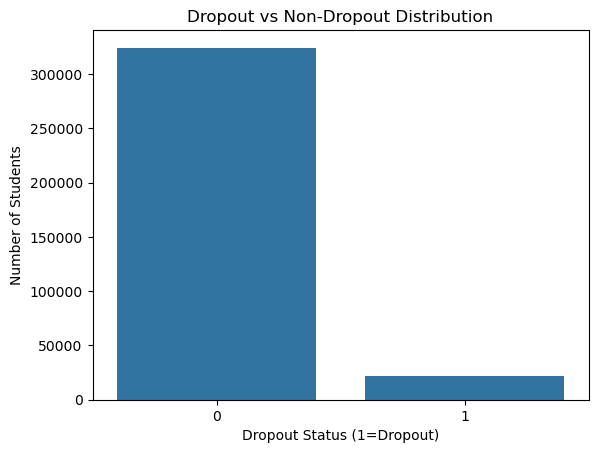

In [15]:
# dropout label from withdrawal codes
dropout_codes = ["W05", "W13", "W15", "W18", "W21", "W22", "W23", "W25"]
df['Dropout_Label'] = df['Withdrawal Code'].isin(dropout_codes).astype(int)

# Dropout Distribution Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Dropout_Label', data=df)
plt.title("Dropout vs Non-Dropout Distribution")
plt.xlabel("Dropout Status (1=Dropout)")
plt.ylabel("Number of Students")
plt.show()


In [19]:
# Cross-tabulation of At-Risk vs Dropout
print("\nCross-tab: At Risk vs Dropout")
print(pd.crosstab(df['At Risk'], df['Dropout_Label']))



Cross-tab: At Risk vs Dropout
Dropout_Label       0      1
At Risk                     
At-Risk         91369   8371
Not At-Risk    232740  13655


In [21]:
# Value Counts of Key Variables
columns_to_check = ['At Risk', 'Economically Disadvantage', 'English Language Learner', 
                    'Homeless Student IND', 'Gender', 'Student With Disablity', 'Race']

for col in columns_to_check:
    if col in df.columns:
        print(f"\n{col} Distribution:")
        print(df[col].value_counts(dropna=False))


At Risk Distribution:
At Risk
Not At-Risk    246395
At-Risk         99740
Name: count, dtype: int64

Economically Disadvantage Distribution:
Economically Disadvantage
Eco. Disadvantaged        210776
Non-Eco. Disadvantaged    135359
Name: count, dtype: int64

English Language Learner Distribution:
English Language Learner
Non-ELL    289879
ELL         56256
Name: count, dtype: int64

Homeless Student IND Distribution:
Homeless Student IND
Non-Homeless    312032
Homeless         34103
Name: count, dtype: int64

Gender Distribution:
Gender
Male      187567
Female    158568
Name: count, dtype: int64

Student With Disablity Distribution:
Student With Disablity
Non-SWD    254602
SWD         91533
Name: count, dtype: int64

Race Distribution:
Race
Hispanic             118059
White                100809
Black                 85781
Two or More Races     21749
Asian                 15230
American Indian        2831
Pacific Islander       1676
Name: count, dtype: int64



 Correlation with Dropout_Label:
                                 Dropout_Label
Dropout_Label                         1.000000
# Dropouts                            0.875995
Cohort Dropouts Count                 0.797681
School Instruction                    0.038488
District Instruction                  0.020317
Senate District                       0.013626
Congressional District                0.013382
House District                        0.006035
# Other Non Graduates                -0.001556
# Still Enrolled Beyond 4 Years      -0.003347
# Cohort                             -0.018647
Outcome - Map                        -0.038185
# Graduates                          -0.038185
Still Enrolled Bynd 4Yrs Count       -0.051336
Adjusted Federal Cohort Count        -0.065550
Other Non Graduates Count            -0.065695
Graduates Count                      -0.097965


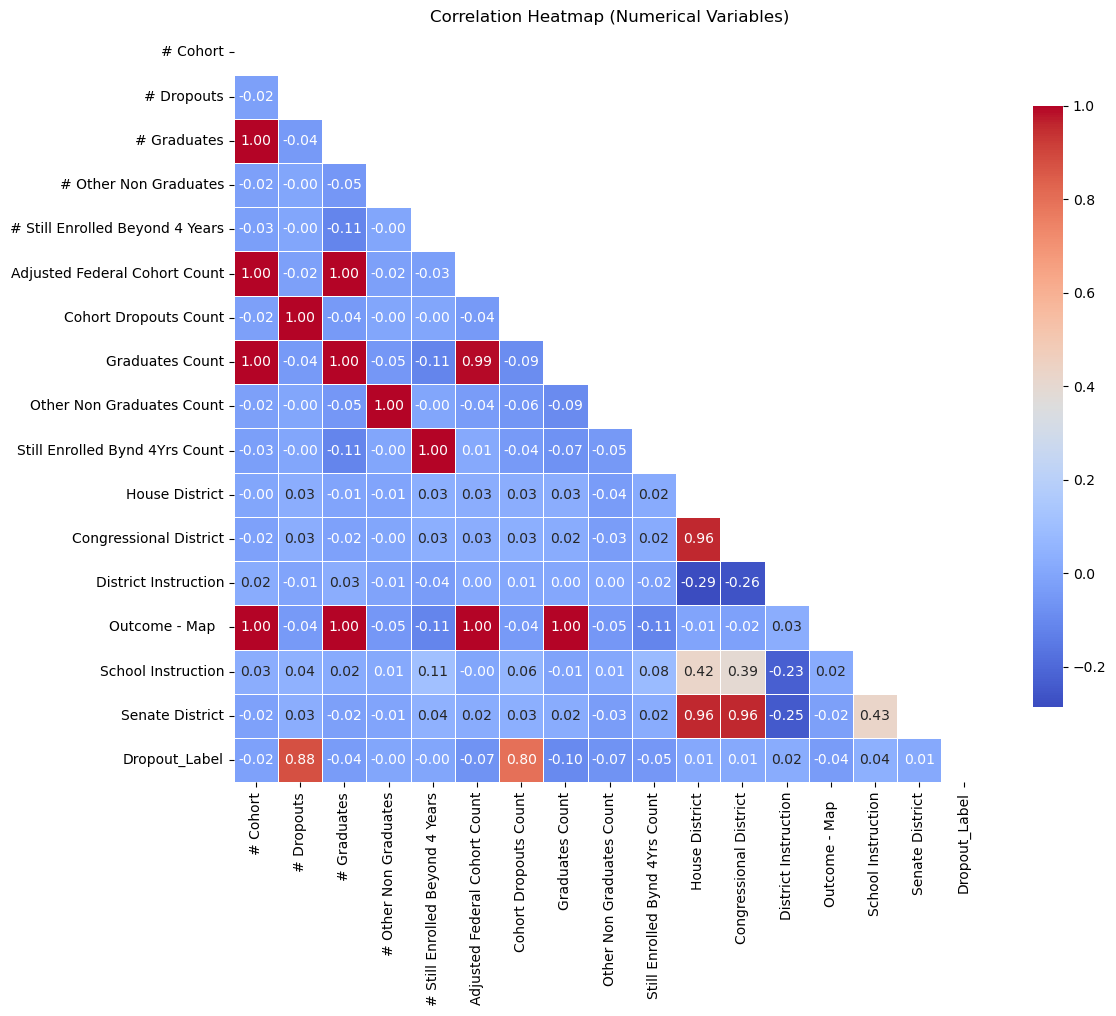

In [23]:
# Filter only numeric columns with enough variability
numeric_df = df.select_dtypes(include=[np.number])

# Remove columns with constant values (zero variance)
numeric_df = numeric_df.loc[:, numeric_df.apply(pd.Series.nunique) > 1]

# Compute correlation matrix
corr_matrix = numeric_df.corr()

if 'Dropout_Label' in corr_matrix.columns:
    focused_corr = corr_matrix[['Dropout_Label']].sort_values(by='Dropout_Label', ascending=False)
    print("\n Correlation with Dropout_Label:")
    print(focused_corr)

# Plot full heatmap (with mask for upper triangle)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap (Numerical Variables)")
plt.tight_layout()
plt.show()


/var/folders/ry/p1zk56hj7lngm613lvc1p7w80000gn/T/ipykernel_50338/4162688769.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="pastel")


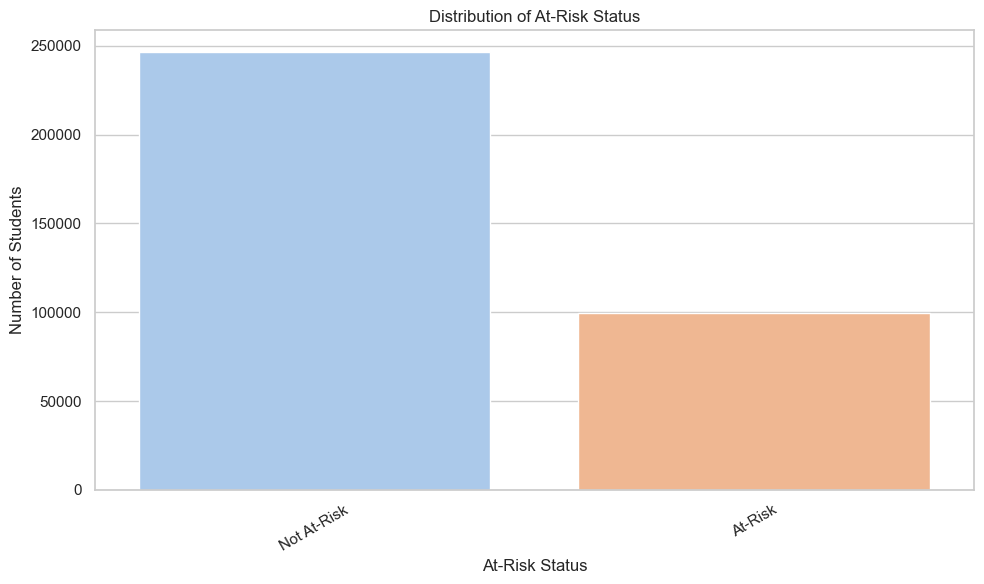

/var/folders/ry/p1zk56hj7lngm613lvc1p7w80000gn/T/ipykernel_50338/4162688769.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="pastel")


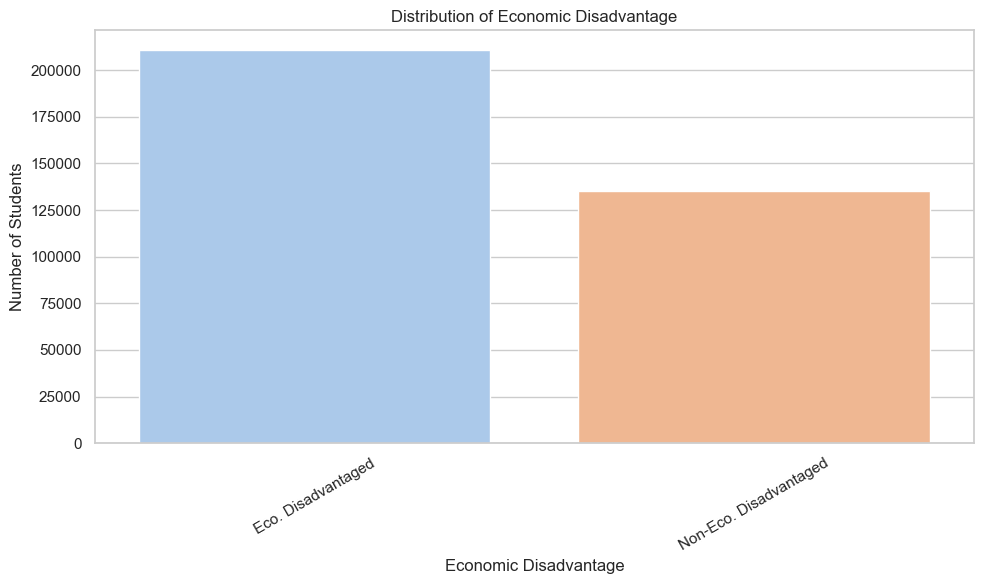

/var/folders/ry/p1zk56hj7lngm613lvc1p7w80000gn/T/ipykernel_50338/4162688769.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="pastel")


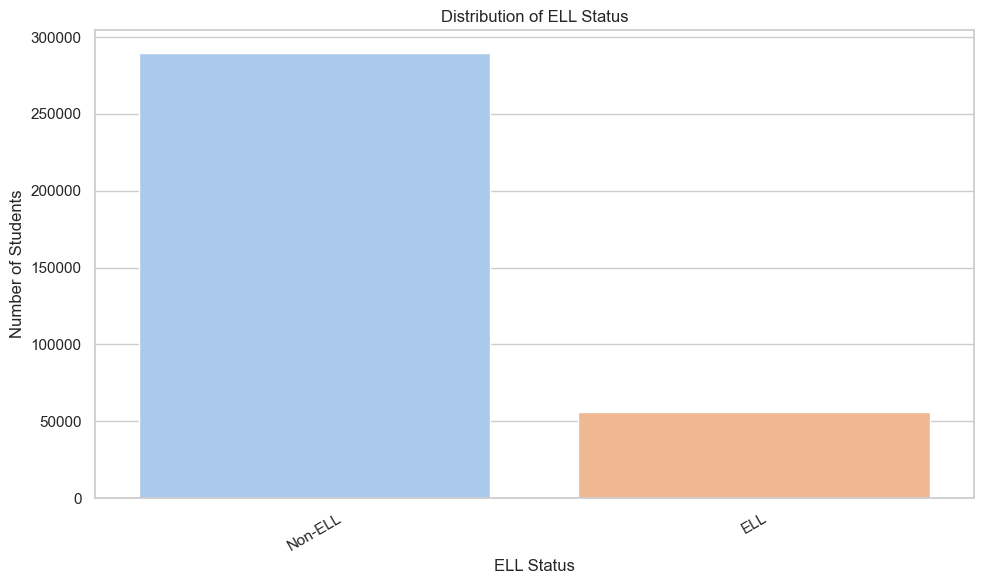

/var/folders/ry/p1zk56hj7lngm613lvc1p7w80000gn/T/ipykernel_50338/4162688769.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="pastel")


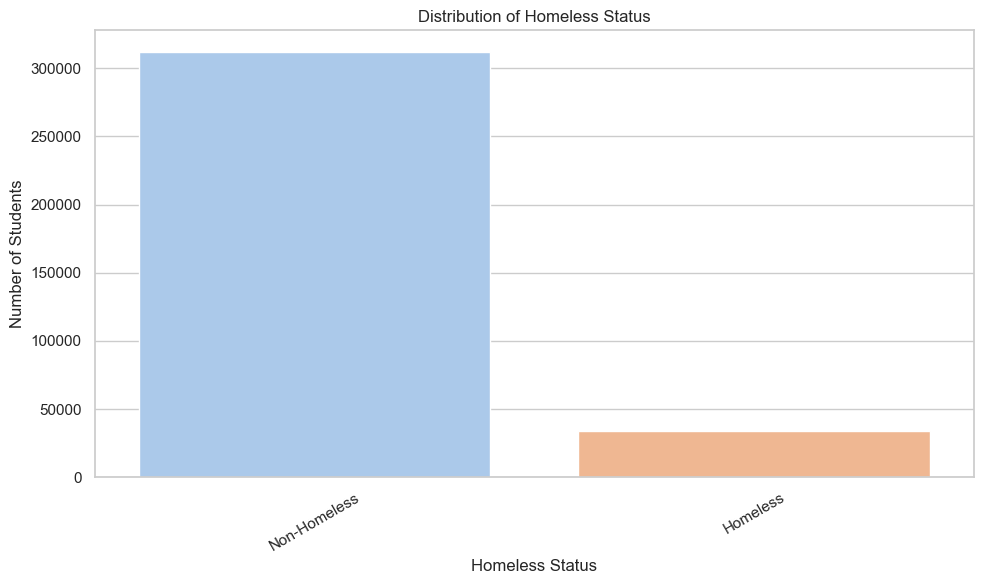

/var/folders/ry/p1zk56hj7lngm613lvc1p7w80000gn/T/ipykernel_50338/4162688769.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="pastel")


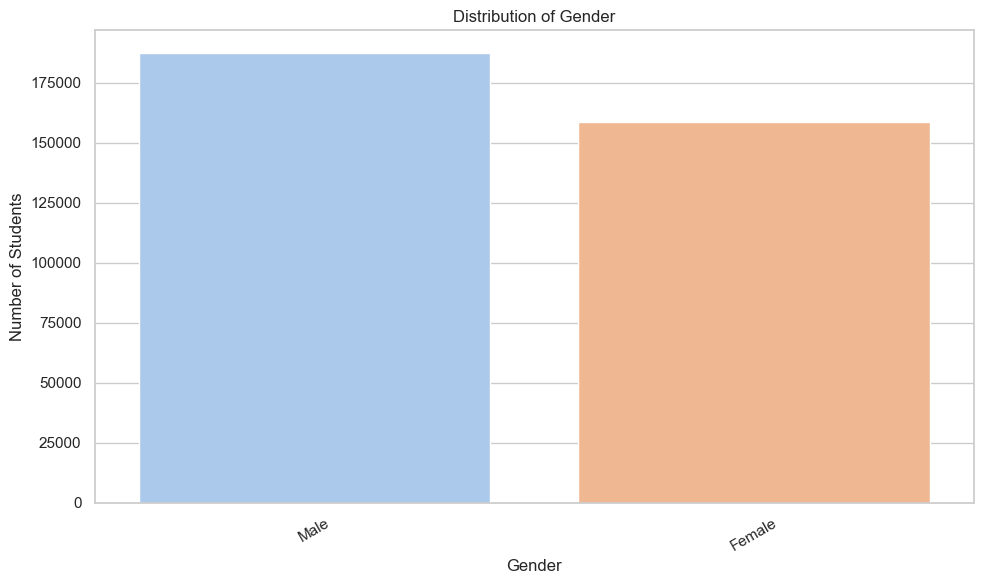

/var/folders/ry/p1zk56hj7lngm613lvc1p7w80000gn/T/ipykernel_50338/4162688769.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="pastel")


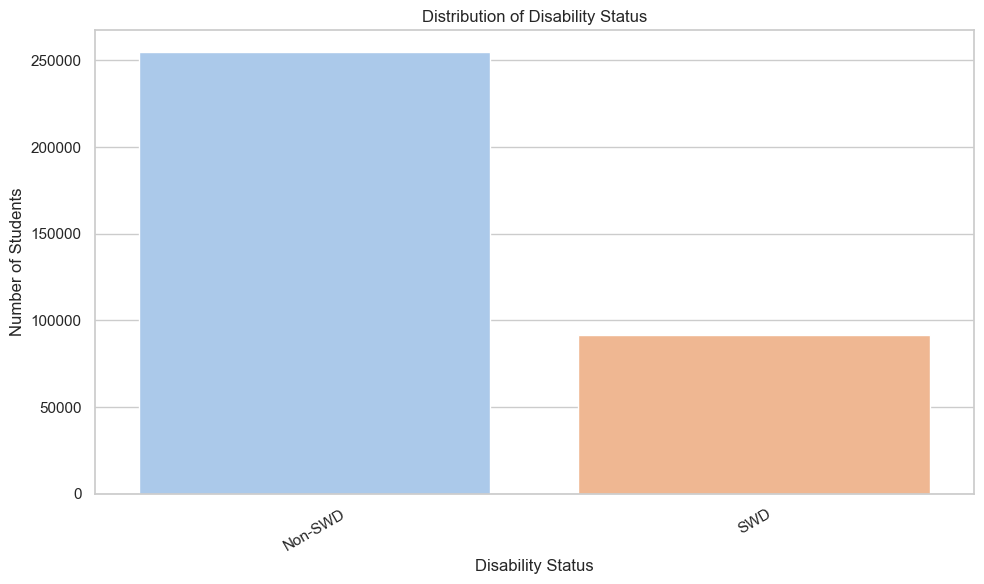

/var/folders/ry/p1zk56hj7lngm613lvc1p7w80000gn/T/ipykernel_50338/4162688769.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="pastel")


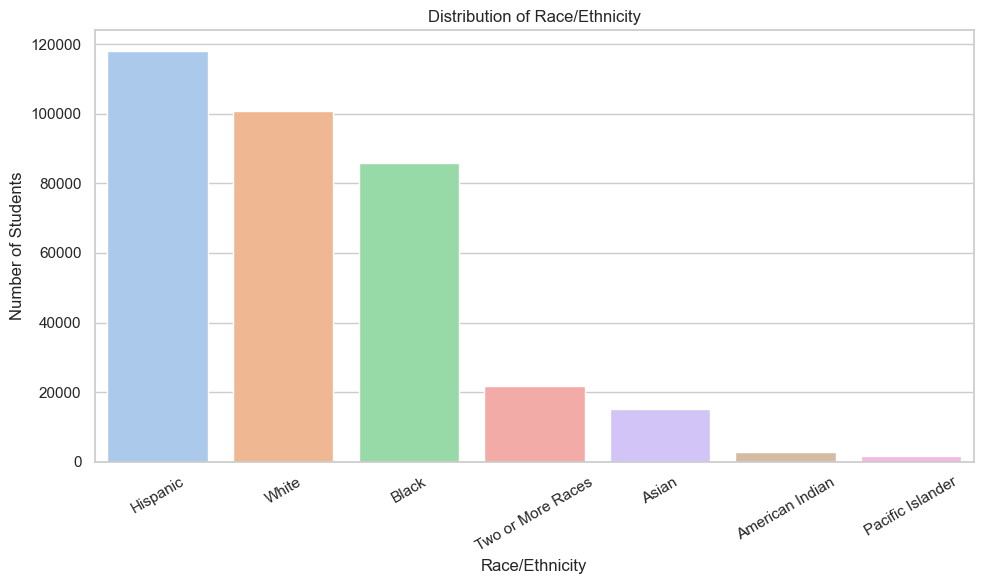

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Mapping of friendly labels
category_columns = {
    'At Risk': 'At-Risk Status',
    'Economically Disadvantage': 'Economic Disadvantage',
    'English Language Learner': 'ELL Status',
    'Homeless Student IND': 'Homeless Status',
    'Gender': 'Gender',
    'Student With Disablity': 'Disability Status',
    'Race': 'Race/Ethnicity'
}

# Plot count plots for each category variable
for col, label in category_columns.items():
    if col in df.columns:
        plt.figure()
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="pastel")
        plt.title(f"Distribution of {label}")
        plt.xticks(rotation=30)
        plt.xlabel(label)
        plt.ylabel("Number of Students")
        plt.tight_layout()
        plt.show()


                    Variable  Chi2 Statistic        p-value  \
6                       Race     1168.801759  2.702718e-249   
1  Economically Disadvantage     1157.168685  1.241309e-253   
0                    At Risk      967.991489  1.628829e-212   
4                     Gender      588.512486  5.277945e-130   
3       Homeless Student IND      127.029941   1.829919e-29   
5     Student With Disablity       54.159077   1.848978e-13   
2   English Language Learner       10.090232   1.490574e-03   

   Degrees of Freedom  
6                   6  
1                   1  
0                   1  
4                   1  
3                   1  
5                   1  
2                   1  


/var/folders/ry/p1zk56hj7lngm613lvc1p7w80000gn/T/ipykernel_50338/2877224789.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Chi2 Statistic", y="Variable", data=chi2_df, palette="viridis")


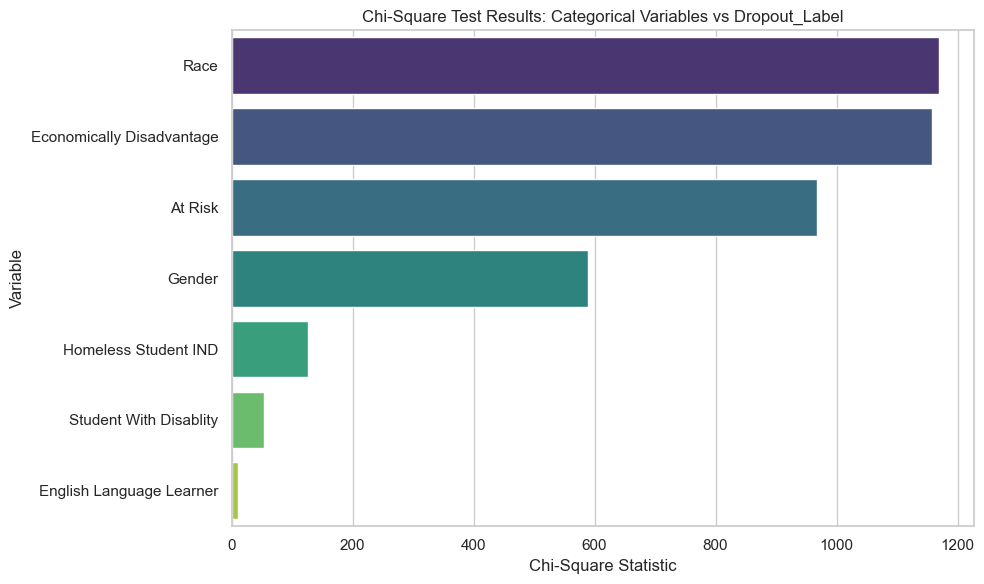

In [27]:
from scipy.stats import chi2_contingency

# List of categorical variables to test against dropout
cat_vars = [
    'At Risk', 'Economically Disadvantage', 'English Language Learner',
    'Homeless Student IND', 'Gender', 'Student With Disablity', 'Race'
]

chi2_results = []

for col in cat_vars:
    if col in df.columns:
        contingency = pd.crosstab(df[col], df['Dropout_Label'])
        chi2, p, dof, expected = chi2_contingency(contingency)
        chi2_results.append({
            "Variable": col,
            "Chi2 Statistic": chi2,
            "p-value": p,
            "Degrees of Freedom": dof
        })

# Convert to DataFrame
chi2_df = pd.DataFrame(chi2_results).sort_values(by="Chi2 Statistic", ascending=False)

# Display results
print(chi2_df)

# Visualization of Chi2 statistics
plt.figure(figsize=(10, 6))
sns.barplot(x="Chi2 Statistic", y="Variable", data=chi2_df, palette="viridis")
plt.title("Chi-Square Test Results: Categorical Variables vs Dropout_Label")
plt.xlabel("Chi-Square Statistic")
plt.tight_layout()
plt.show()

In [29]:
# Set visual style
sns.set(style="whitegrid")

# Dropout codes to investigate
dropout_codes = ["W05", "W13", "W15", "W18", "W21", "W22", "W23", "W25"]

# Count all withdrawal codes
withdrawal_counts = df['Withdrawal Code'].value_counts().sort_index()

# Count only dropout-related withdrawal codes
dropout_counts = df['Withdrawal Code'][df['Withdrawal Code'].isin(dropout_codes)].value_counts().sort_index()

# Create a summary DataFrame
summary = pd.DataFrame({
    'Withdrawal Code': withdrawal_counts.index,
    'Total Students': withdrawal_counts.values,
})
summary['Dropout Flagged'] = summary['Withdrawal Code'].isin(dropout_codes).astype(int)
summary['Dropout Count'] = summary['Withdrawal Code'].map(dropout_counts).fillna(0).astype(int)

# Filter only the dropout codes for display
dropout_summary = summary[summary['Withdrawal Code'].isin(dropout_codes)]

# Display the summary table
print("Dropout Code Analysis Summary:")
display(dropout_summary)


Dropout Code Analysis Summary:


,Withdrawal Code,Total Students,Dropout Flagged,Dropout Count
4,W05,4954,1,4954
10,W13,476,1,476
11,W15,8001,1,8001
12,W18,444,1,444
13,W21,269,1,269
14,W22,6072,1,6072
15,W23,1810,1,1810


/var/folders/ry/p1zk56hj7lngm613lvc1p7w80000gn/T/ipykernel_50338/3217952130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Withdrawal Code', y='Dropout Count', data=dropout_summary, palette="Reds_d")


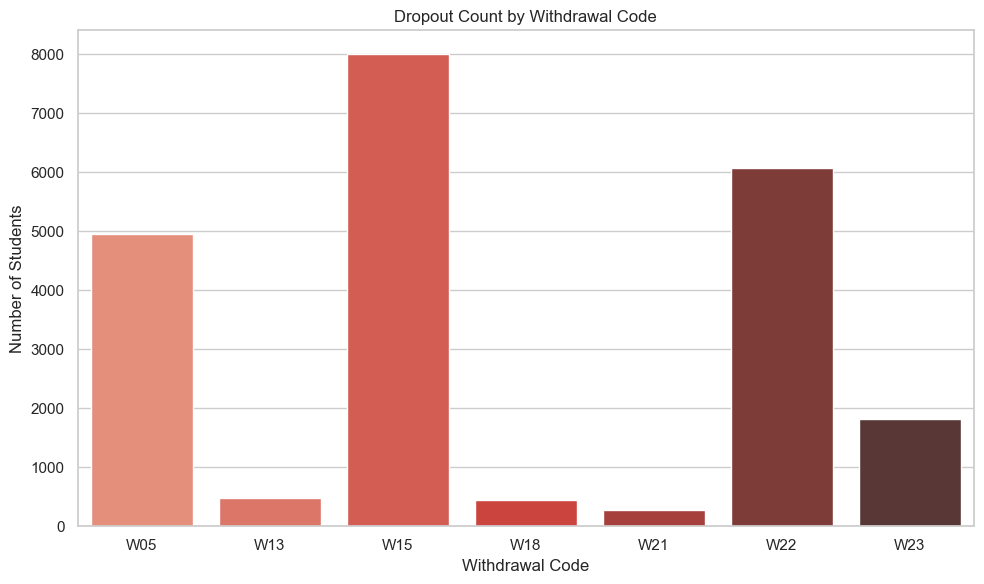

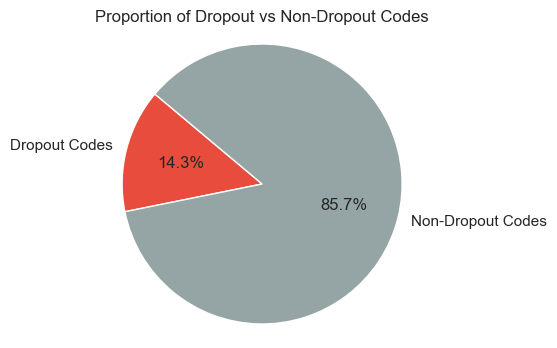

In [31]:

# Bar chart of dropout counts by code
plt.figure(figsize=(10, 6))
sns.barplot(x='Withdrawal Code', y='Dropout Count', data=dropout_summary, palette="Reds_d")
plt.title("Dropout Count by Withdrawal Code")
plt.xlabel("Withdrawal Code")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

# Proportion of dropout vs non-dropout codes
plt.figure(figsize=(6, 4))
labels = ['Dropout Codes', 'Non-Dropout Codes']
sizes = [summary['Dropout Flagged'].sum(), len(summary) - summary['Dropout Flagged'].sum()]
colors = ['#e74c3c', '#95a5a6']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title("Proportion of Dropout vs Non-Dropout Codes")
plt.show()


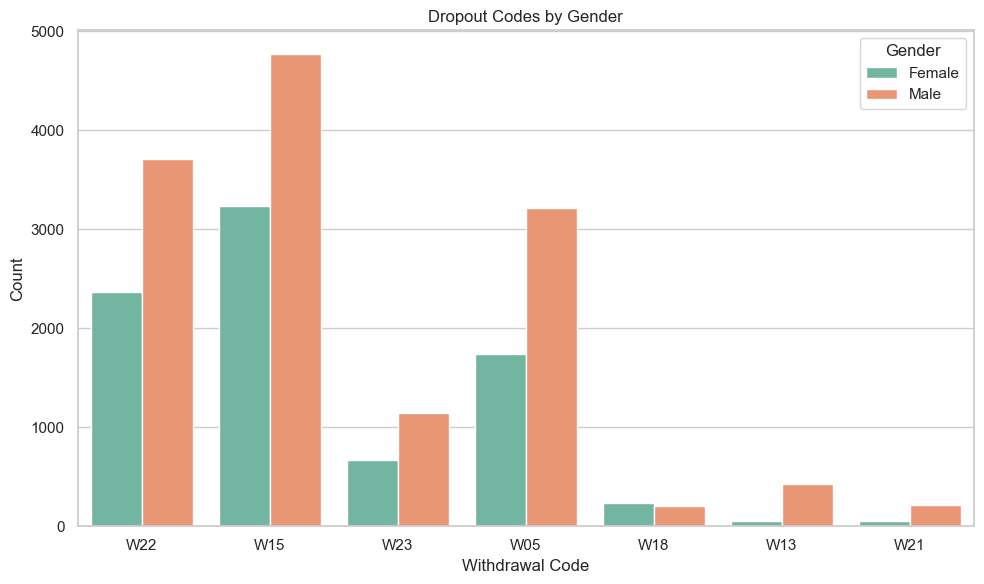

In [33]:
# Gender vs Dropout Code
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Withdrawal Code'].isin(dropout_codes)],
              x='Withdrawal Code', hue='Gender', palette='Set2')
plt.title("Dropout Codes by Gender")
plt.xlabel("Withdrawal Code")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


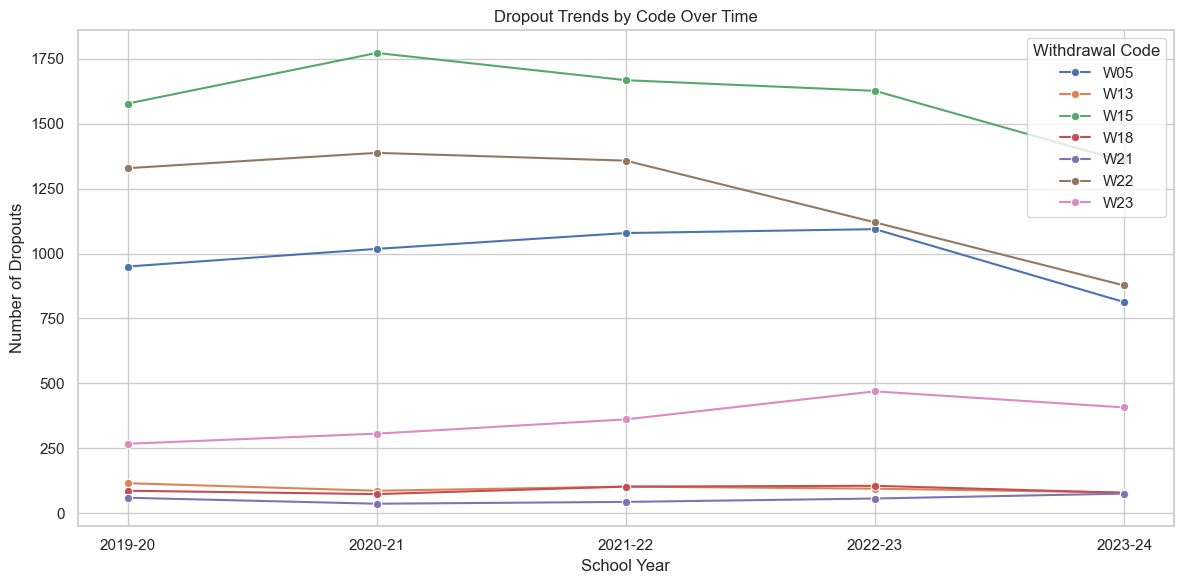

In [35]:
# Assuming a 'School Year' column exists
trend_df = df[df['Withdrawal Code'].isin(dropout_codes)]
trend_by_year = trend_df.groupby(['School Year', 'Withdrawal Code']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_by_year, x='School Year', y='Count', hue='Withdrawal Code', marker="o")
plt.title("Dropout Trends by Code Over Time")
plt.ylabel("Number of Dropouts")
plt.xlabel("School Year")
plt.tight_layout()
plt.show()


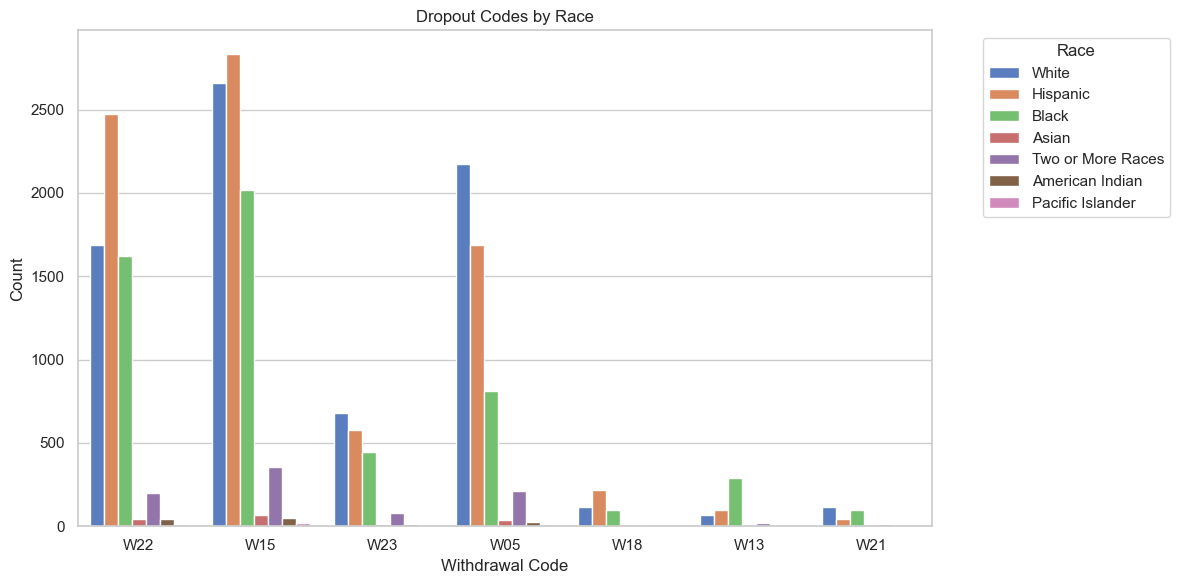

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Withdrawal Code'].isin(dropout_codes)],
              x='Withdrawal Code', hue='Race', palette='muted')
plt.title("Dropout Codes by Race")
plt.xlabel("Withdrawal Code")
plt.ylabel("Count")
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [39]:
# Chi-square test for Withdrawal Code vs Gender
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Withdrawal Code'], df['Gender'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-Square Test: Withdrawal Code vs Gender")
print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}, Degrees of Freedom: {dof}")


Chi-Square Test: Withdrawal Code vs Gender
Chi2: 4010.04, p-value: 0.0000, Degrees of Freedom: 48


/var/folders/ry/p1zk56hj7lngm613lvc1p7w80000gn/T/ipykernel_50338/1725747858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dropout_severity.index, y=dropout_severity.values, palette='Oranges_r')


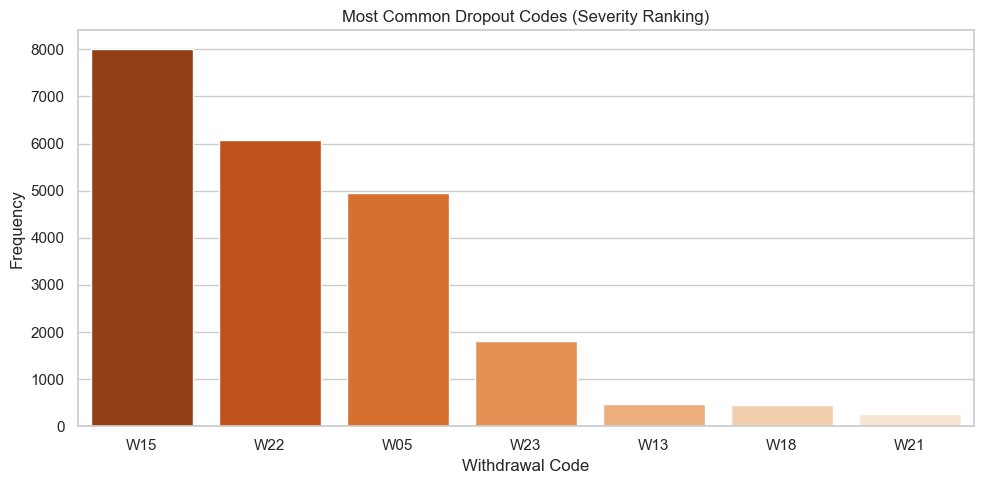

In [41]:
dropout_severity = df[df['Withdrawal Code'].isin(dropout_codes)]['Withdrawal Code'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=dropout_severity.index, y=dropout_severity.values, palette='Oranges_r')
plt.title("Most Common Dropout Codes (Severity Ranking)")
plt.xlabel("Withdrawal Code")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


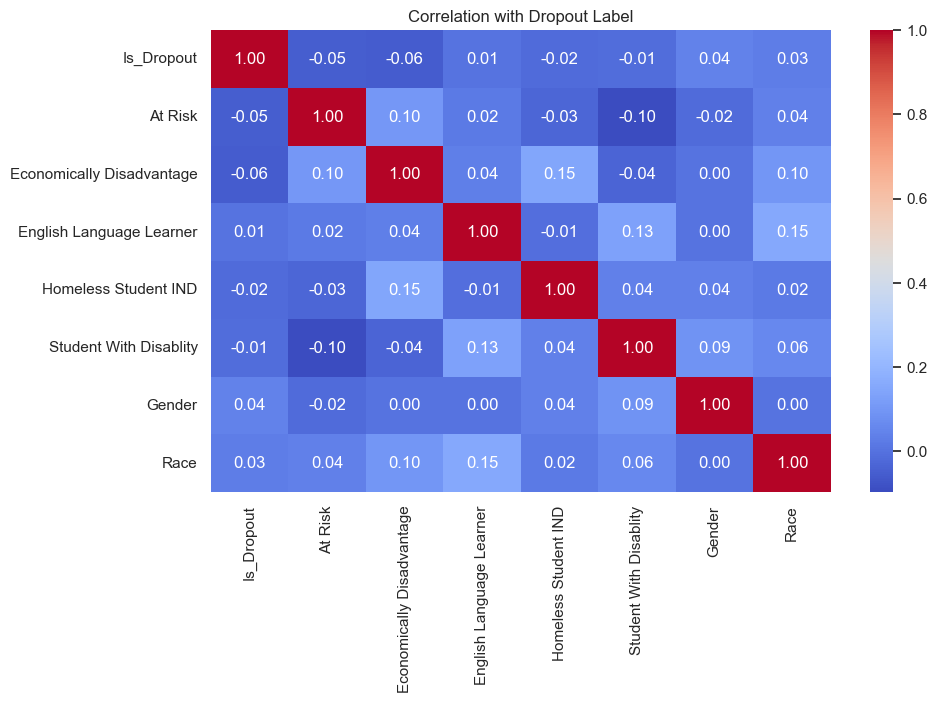

In [43]:
from sklearn.preprocessing import LabelEncoder

# Encode dropout codes for analysis
df['Is_Dropout'] = df['Withdrawal Code'].isin(dropout_codes).astype(int)

# Encode categorical features for correlation
encoded_df = df.copy()
for col in ['Gender', 'Race', 'At Risk', 'Economically Disadvantage',
            'English Language Learner', 'Homeless Student IND', 'Student With Disablity']:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))

# Select only numeric columns
corr_df = encoded_df[['Is_Dropout', 'At Risk', 'Economically Disadvantage',
                      'English Language Learner', 'Homeless Student IND',
                      'Student With Disablity', 'Gender', 'Race']]

# Correlation matrix
correlation_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Dropout Label")
plt.show()


In [45]:
# Dropout rates by Gender and Race
grouped = df[df['Withdrawal Code'].isin(dropout_codes)].groupby(['Gender', 'Race']).size().reset_index(name='Dropouts')
totals = df.groupby(['Gender', 'Race']).size().reset_index(name='Total')
merged = pd.merge(grouped, totals, on=['Gender', 'Race'])
merged['Dropout Rate'] = merged['Dropouts'] / merged['Total']

# Display top dropout combinations
merged.sort_values('Dropout Rate', ascending=False).head(10)


,Gender,Race,Dropouts,Total,Dropout Rate
13,Male,White,4631,55361,0.083651
10,Male,Hispanic,4937,63589,0.077639
9,Male,Black,3342,46869,0.071305
6,Female,White,2860,45448,0.062929
7,Male,American Indian,83,1473,0.056348
3,Female,Hispanic,2982,54470,0.054746
2,Female,Black,2042,38912,0.052477
12,Male,Two or More Races,539,11356,0.047464
11,Male,Pacific Islander,34,858,0.039627
0,Female,American Indian,50,1358,0.036819


In [47]:
# Filter only rows with dropout codes
df_dropout = df[df['Withdrawal Code'].isin(dropout_codes)].copy()

# Encode categorical columns for correlation
encoded = df_dropout.copy()
categorical_vars = ['At Risk', 'Economically Disadvantage', 'English Language Learner',
                    'Homeless Student IND', 'Gender', 'Student With Disablity', 'Race']


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_vars:
    encoded[col] = encoder.fit_transform(encoded[col].astype(str))

# Add dropout code as the target
encoded['Dropout_Code'] = encoded['Withdrawal Code']


In [49]:
# One-hot encode dropout codes
code_dummies = pd.get_dummies(encoded['Dropout_Code'], prefix='Code')

# Concatenate features
analysis_df = pd.concat([encoded[categorical_vars], code_dummies], axis=1)

# Compute correlations
correlations = analysis_df.corr()[code_dummies.columns].T[categorical_vars]

# Display top correlation values for each code
print(" Correlation (proxy) between Dropout Codes and Features:")
display(correlations.style.background_gradient(cmap='coolwarm', axis=1).format("{:.2f}"))


 Correlation (proxy) between Dropout Codes and Features:


,At Risk,Economically Disadvantage,English Language Learner,Homeless Student IND,Gender,Student With Disablity,Race
Code_W05,0.02,0.04,0.01,0.02,0.03,0.02,0.12
Code_W13,-0.00,-0.00,0.04,-0.00,0.08,0.03,-0.08
Code_W15,-0.04,-0.03,0.02,-0.03,-0.04,0.03,-0.01
Code_W18,0.02,0.00,-0.01,0.02,-0.05,0.02,-0.02
Code_W21,0.01,0.01,0.04,0.01,0.04,-0.04,0.01
Code_W22,0.00,0.00,-0.05,0.01,-0.01,-0.06,-0.08
Code_W23,0.02,-0.02,0.01,-0.00,0.01,-0.00,0.02


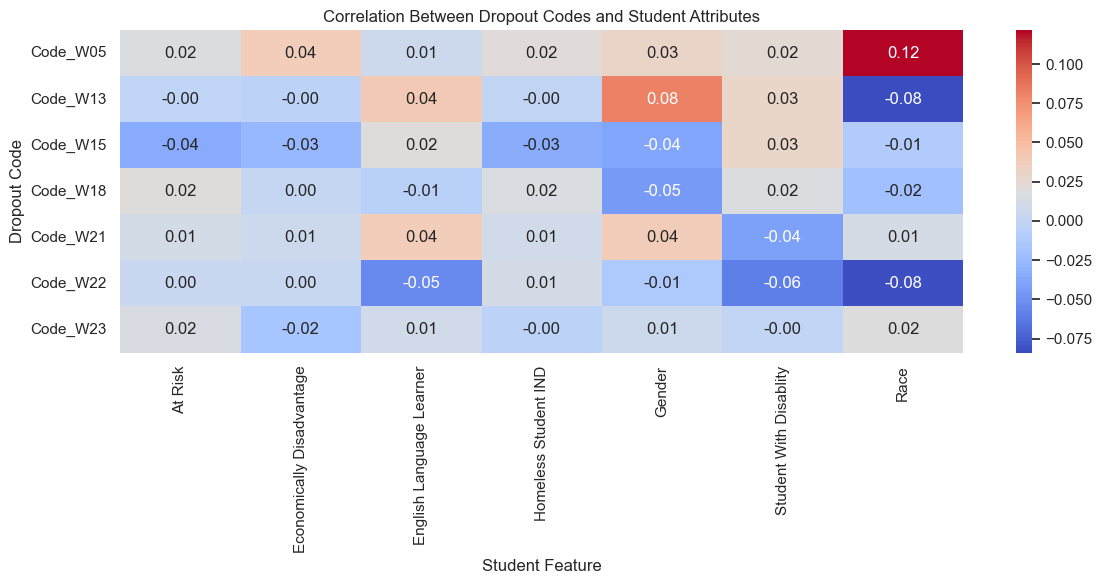

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Dropout Codes and Student Attributes")
plt.ylabel("Dropout Code")
plt.xlabel("Student Feature")
plt.tight_layout()
plt.show()


In [53]:
from scipy.stats import chi2_contingency

print("Chi-Square Tests for Categorical Features vs Dropout Codes:\n")
for code in dropout_codes:
    print(f"\n--- Dropout Code: {code} ---")
    for var in categorical_vars:
        contingency = pd.crosstab(df_dropout['Withdrawal Code'] == code, df_dropout[var])
        chi2, p, dof, _ = chi2_contingency(contingency)
        print(f"{var}: Chi2 = {chi2:.2f}, p = {p:.4f}")


Chi-Square Tests for Categorical Features vs Dropout Codes:


--- Dropout Code: W05 ---
At Risk: Chi2 = 6.26, p = 0.0123
Economically Disadvantage: Chi2 = 31.05, p = 0.0000
English Language Learner: Chi2 = 0.77, p = 0.3798
Homeless Student IND: Chi2 = 9.82, p = 0.0017
Gender: Chi2 = 20.00, p = 0.0000
Student With Disablity: Chi2 = 12.61, p = 0.0004
Race: Chi2 = 360.68, p = 0.0000

--- Dropout Code: W13 ---
At Risk: Chi2 = 0.02, p = 0.8789
Economically Disadvantage: Chi2 = 0.28, p = 0.5988
English Language Learner: Chi2 = 36.57, p = 0.0000
Homeless Student IND: Chi2 = 0.00, p = 0.9811
Gender: Chi2 = 147.19, p = 0.0000
Student With Disablity: Chi2 = 19.33, p = 0.0000
Race: Chi2 = 355.75, p = 0.0000

--- Dropout Code: W15 ---
At Risk: Chi2 = 26.91, p = 0.0000
Economically Disadvantage: Chi2 = 15.17, p = 0.0001
English Language Learner: Chi2 = 8.56, p = 0.0034
Homeless Student IND: Chi2 = 25.71, p = 0.0000
Gender: Chi2 = 31.99, p = 0.0000
Student With Disablity: Chi2 = 19.49, p = 0.0000
Ra

In [55]:
# Categorical variables and dropout codes
categorical_vars = ['At Risk', 'Economically Disadvantage', 'English Language Learner',
                    'Homeless Student IND', 'Gender', 'Student With Disablity', 'Race']
dropout_codes = ["W05", "W13", "W15", "W18", "W21", "W22", "W23", "W25"]


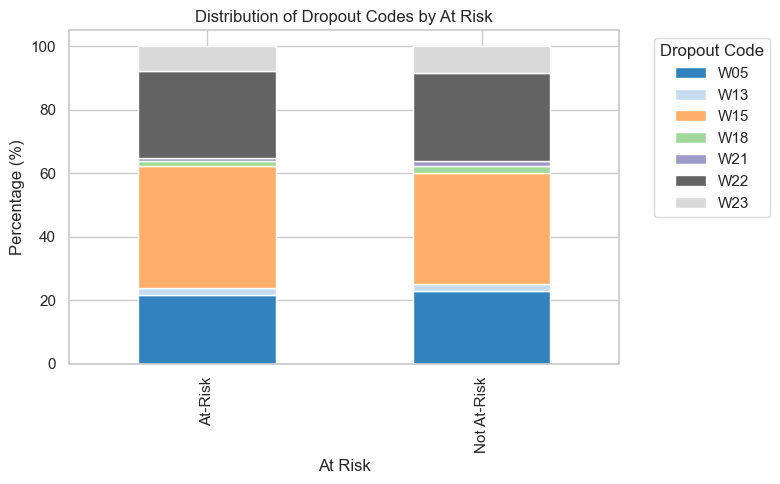

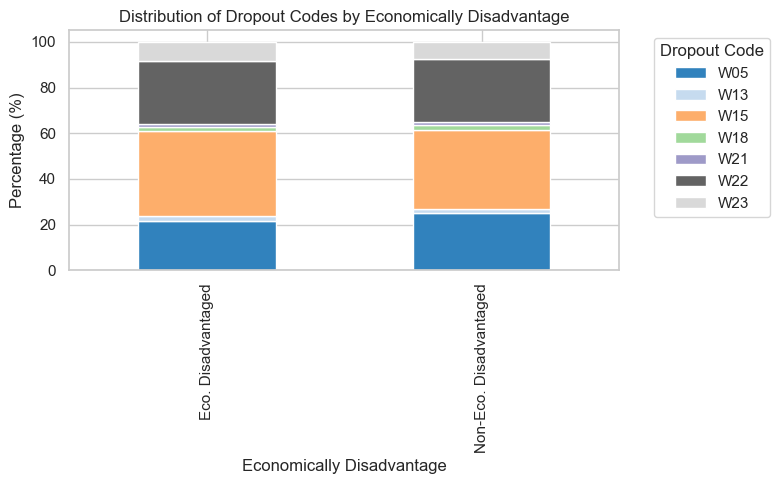

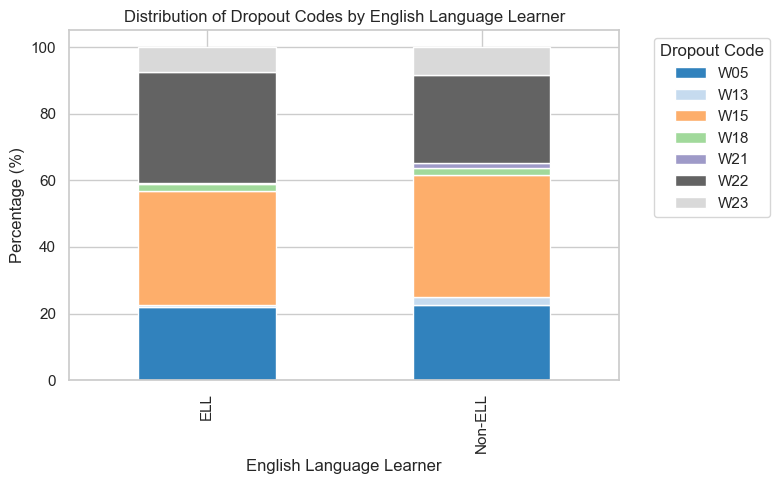

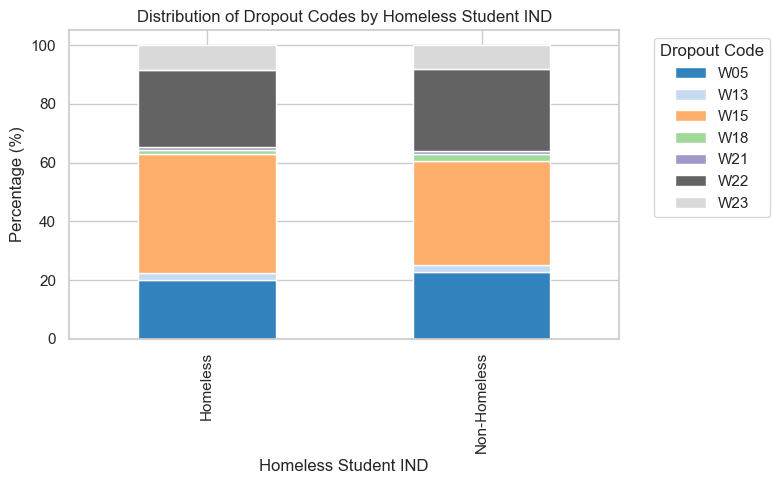

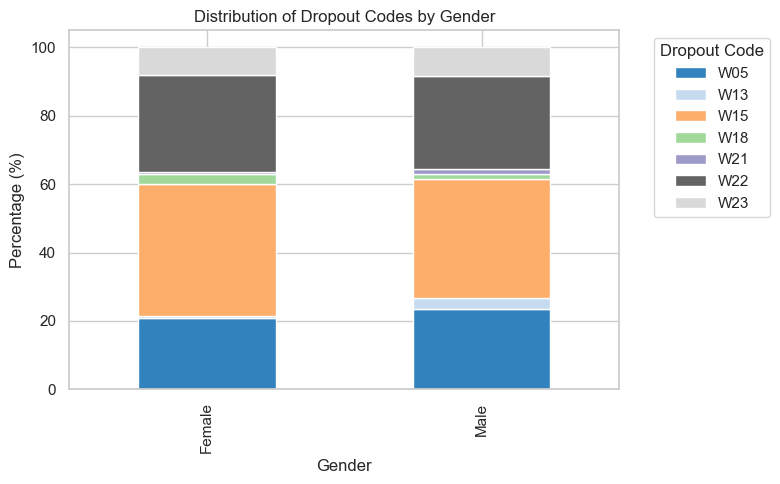

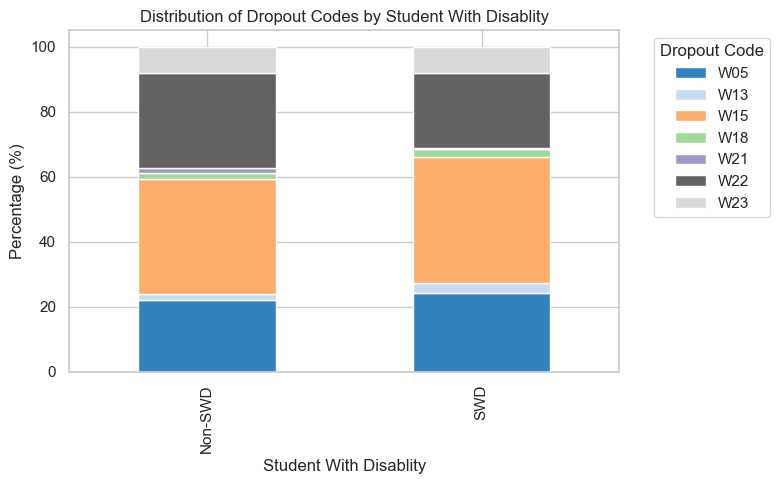

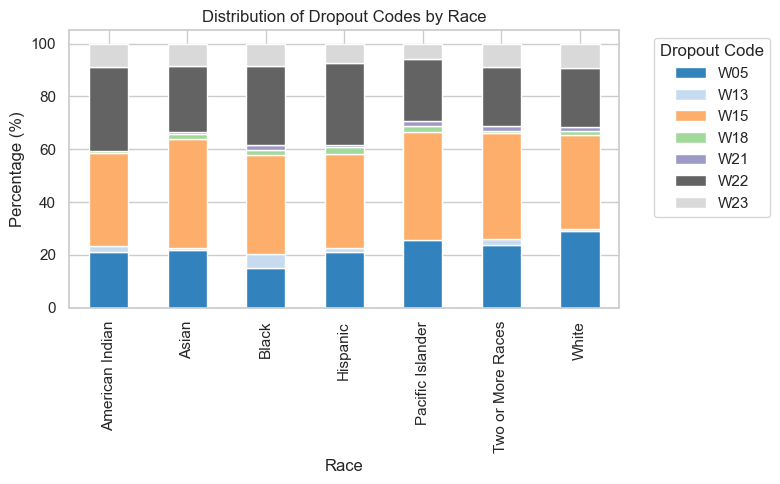

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

for var in categorical_vars:
    # Create cross-tab of feature vs. dropout code
    ctab = pd.crosstab(df_dropout[var], df_dropout['Withdrawal Code'], normalize='index') * 100
    ctab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='tab20c')

    plt.title(f"Distribution of Dropout Codes by {var}")
    plt.xlabel(var)
    plt.ylabel("Percentage (%)")
    plt.legend(title='Dropout Code', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


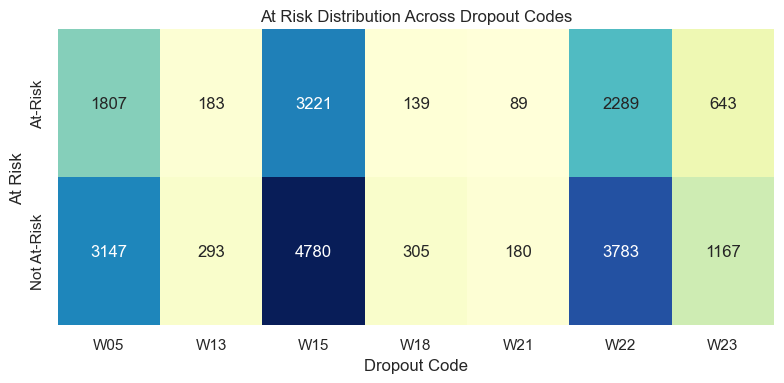

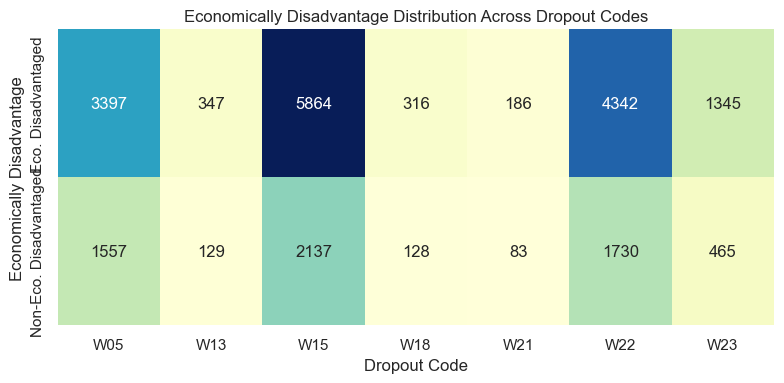

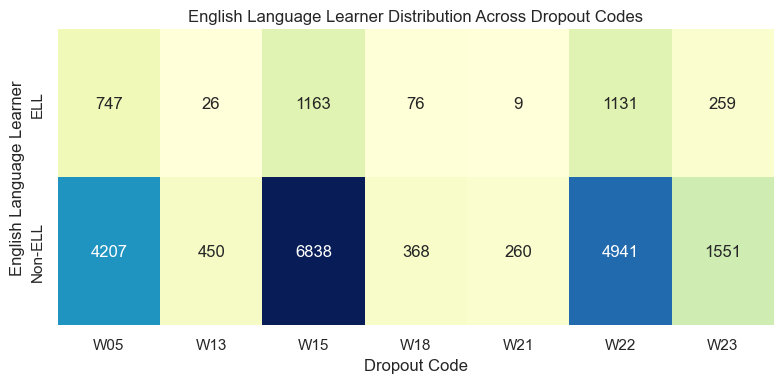

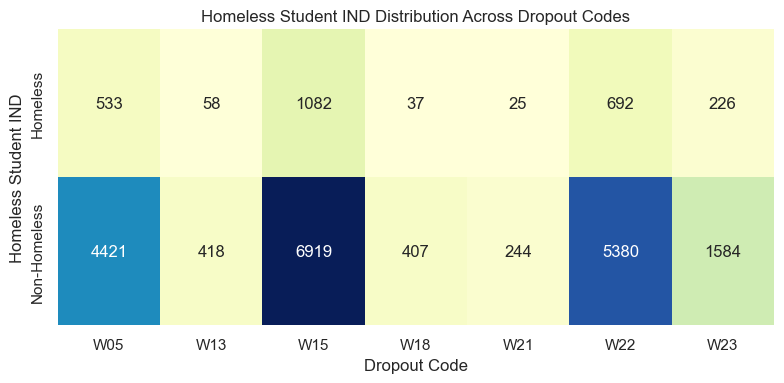

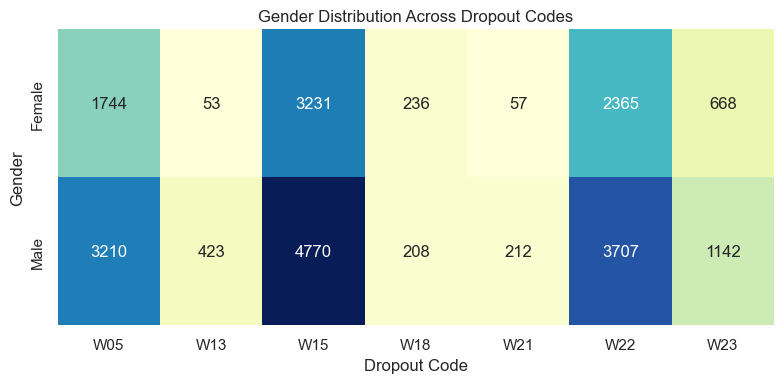

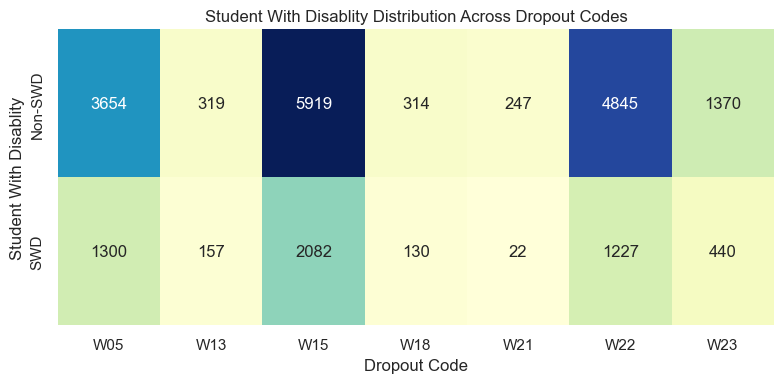

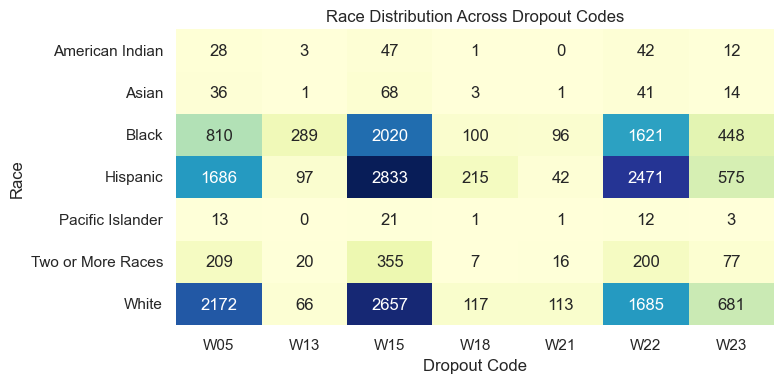

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of encoded categorical variables
categorical_vars = ['At Risk', 'Economically Disadvantage', 'English Language Learner',
                    'Homeless Student IND', 'Gender', 'Student With Disablity', 'Race']

# Filter dropout code rows
dropout_codes = ["W05", "W13", "W15", "W18", "W21", "W22", "W23", "W25"]
df_dropout = df[df['Withdrawal Code'].isin(dropout_codes)].copy()

# Create heatmap for each variable
for var in categorical_vars:
    # Create a pivot table for counts
    ct = pd.crosstab(df_dropout[var], df_dropout['Withdrawal Code'])

    # Plot heatmap
    plt.figure(figsize=(8, 4))
    sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
    plt.title(f"{var} Distribution Across Dropout Codes")
    plt.xlabel("Dropout Code")
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


In [61]:
from scipy.stats import chi2_contingency
import pandas as pd

# Filter relevant dropout data
dropout_codes = ["W05", "W13", "W15", "W18", "W21", "W22", "W23", "W25"]
categorical_vars = ['At Risk', 'Economically Disadvantage', 'English Language Learner',
                    'Homeless Student IND', 'Gender', 'Student With Disablity', 'Race']
df_dropout = df[df['Withdrawal Code'].isin(dropout_codes)].copy()

# Store per-code test results
per_code_results = []

for code in dropout_codes:
    df_temp = df_dropout.copy()
    df_temp['Target'] = (df_temp['Withdrawal Code'] == code).astype(int) 

    for var in categorical_vars:
        contingency = pd.crosstab(df_temp[var], df_temp['Target'])
        if contingency.shape[1] == 2: 
            chi2, p, dof, _ = chi2_contingency(contingency)
            per_code_results.append({
                'Dropout Code': code,
                'Variable': var,
                'Chi2 Score': chi2,
                'p-value': p
            })

# Convert to DataFrame and sort
per_code_df = pd.DataFrame(per_code_results)
per_code_df = per_code_df.sort_values(by=["Dropout Code", "p-value"])

# Show top predictors per code
print("\n Top Predictive Variables Per Dropout Code (by Chi-square):")
display(per_code_df.groupby("Dropout Code").head(3))  # Top 3 per code



 Top Predictive Variables Per Dropout Code (by Chi-square):


,Dropout Code,Variable,Chi2 Score,p-value
6,W05,Race,360.679603,7.859389e-75
1,W05,Economically Disadvantage,31.047325,2.518131e-08
4,W05,Gender,19.996355,7.758994e-06
13,W13,Race,355.753152,8.979977e-74
11,W13,Gender,147.192400,7.123147e-34
9,W13,English Language Learner,36.572872,1.470642e-09
18,W15,Gender,31.992701,1.547530e-08
14,W15,At Risk,26.906082,2.135857e-07
17,W15,Homeless Student IND,25.706937,3.973960e-07
25,W18,Gender,43.959443,3.352511e-11


###  **Conclusion: Variable Importance per Dropout Code**

* **Race** emerged as the most powerful distinguishing factor for **W05**, **W13**, **W21**, and especially **W22**, with extremely high chi-square scores and p-values approaching zero. This suggests **demographic disparities** may be driving assignment to these withdrawal codes.

* **Gender** was a strong predictor for multiple codes including **W05**, **W13**, **W15**, **W18**, and **W21**, indicating possible gender-related pathways in student dropout or reassignment types.

* **W13** (potentially an involuntary or disciplinary withdrawal code) was significantly predicted by **Race**, **Gender**, and **ELL status**, raising concerns about equity in how these statuses contribute to dropout classifications.

* **English Language Learner** status stood out for **W13** and **W22**, suggesting that **language barriers** may be a key factor in those types of exits.

* **Disability status** was highly associated with **W21** and **W22**, indicating that students with disabilities may disproportionately receive these particular withdrawal codes — an important signal for targeted interventions or policy review.

* **At Risk** and **Economically Disadvantaged** status were consistently present but with lower chi-square values compared to demographic and support-related indicators, suggesting they are still important, but perhaps **not as uniquely predictive per code**.

---

###  Implications:

This analysis reveals that **different dropout codes are not assigned uniformly across student groups**. Instead, they are often associated with specific demographic or educational support variables, highlighting:

* The need for **equity-focused reviews** of withdrawal practices.
* Opportunities for **targeted early intervention** in high-risk subgroups.
* The potential value of **code-specific support strategies** (e.g., for W13 vs W22).




###  Key Insights:

* **Race** was the strongest predictor for codes like **W05**, **W13**, **W21**, and **W22**, suggesting demographic imbalances in code assignment.
* **Gender** showed predictive strength for **W05**, **W13**, **W15**, **W18**, and **W21**, hinting at gender-based patterns in withdrawal outcomes.
* **Disability** and **ELL status** were most associated with **W22** and **W13**, revealing potential vulnerabilities in support populations.
* **At Risk** and **Economic Disadvantage** were moderately predictive across multiple codes but less dominant than identity-based factors.
* These patterns suggest that **different withdrawal codes are shaped by distinct underlying factors**, highlighting the need for **code-specific interventions** and **equity reviews**.

---

###  Table: Top Predictive Variables per Dropout Code

| Dropout Code | 1st Variable | 2nd Variable               | 3rd Variable             |
| ------------ | ------------ | -------------------------- | ------------------------ |
| **W05**      | Race         | Economically Disadvantaged | Gender                   |
| **W13**      | Race         | Gender                     | English Language Learner |
| **W15**      | Gender       | At Risk                    | Homeless Student IND     |
| **W18**      | Gender       | Race                       | At Risk                  |
| **W21**      | Race         | Student With Disability    | Gender                   |
| **W22**      | Race         | Student With Disability    | English Language Learner |
| **W23**      | Race         | Economically Disadvantaged | At Risk                  |



### H1: Students flagged as "At-Risk" by the district have a significantly higher likelihood of dropping out compared to their peers.

In [67]:
from scipy.stats import chi2_contingency
import pandas as pd

# Ensure 'Dropout_Label' is already created based on withdrawal codes
# If not, recreate it:
dropout_codes = ["W05", "W13", "W15", "W18", "W21", "W22", "W23", "W25"]
df['Dropout_Label'] = df['Withdrawal Code'].isin(dropout_codes).astype(int)

# Build contingency table
contingency_table = pd.crosstab(df['At Risk'], df['Dropout_Label'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print(" Hypothesis Test: H1 - At Risk vs Dropout")
print("Contingency Table:")
print(contingency_table)
print(f"\nChi2 Statistic = {chi2:.3f}")
print(f"Degrees of Freedom = {dof}")
print(f"p-value = {p:.5f}")

# Conclusion
alpha = 0.05
if p < alpha:
    print("\n Result: Statistically significant. At-risk status is associated with dropout.")
else:
    print("\n Result: Not statistically significant. No association detected.")


 Hypothesis Test: H1 - At Risk vs Dropout
Contingency Table:
Dropout_Label       0      1
At Risk                     
At-Risk         91369   8371
Not At-Risk    232740  13655

Chi2 Statistic = 967.991
Degrees of Freedom = 1
p-value = 0.00000

 Result: Statistically significant. At-risk status is associated with dropout.


In [69]:
# Extract counts and compute dropout percentages
at_risk_0, at_risk_1 = contingency_table.iloc[0]
not_risk_0, not_risk_1 = contingency_table.iloc[1]

at_risk_dropout_pct = at_risk_1 / (at_risk_0 + at_risk_1) * 100
not_risk_dropout_pct = not_risk_1 / (not_risk_0 + not_risk_1) * 100

print(f"\nAt-Risk Dropout Rate: {at_risk_dropout_pct:.2f}%")
print(f"Not At-Risk Dropout Rate: {not_risk_dropout_pct:.2f}%")



At-Risk Dropout Rate: 8.39%
Not At-Risk Dropout Rate: 5.54%


- The p-value is far below 0.05, indicating a highly statistically significant relationship between at-risk status and dropout.
- A significantly higher proportion of students who dropped out were flagged as At-Risk.
- The Chi-Square test confirms that being marked as "At-Risk" is strongly associated with dropout outcomes.
- As at_risk students are likely to drop 8.4% which is approximately 3% more than the non_risk, it strongly suggests that at_risk students are more likely to dropout than the non_risk students.

### H2: Students identified as economically disadvantaged or experiencing homelessness will show a statistically significant correlation with dropout outcomes.


In [73]:
from scipy.stats import chi2_contingency
import pandas as pd

# Ensure Dropout_Label exists
dropout_codes = ["W05", "W13", "W15", "W18", "W21", "W22", "W23", "W25"]
df['Dropout_Label'] = df['Withdrawal Code'].isin(dropout_codes).astype(int)

# Economic Disadvantage Test
econ_table = pd.crosstab(df['Economically Disadvantage'], df['Dropout_Label'])
econ_chi2, econ_p, econ_dof, _ = chi2_contingency(econ_table)

print(" Economic Disadvantage vs Dropout")
print(econ_table)
print(f"Chi2 = {econ_chi2:.3f}, p = {econ_p:.5f}, dof = {econ_dof}")
print(" Statistically significant" if econ_p < 0.05 else " Not significant")

# Homeless Status Test
homeless_table = pd.crosstab(df['Homeless Student IND'], df['Dropout_Label'])
homeless_chi2, homeless_p, homeless_dof, _ = chi2_contingency(homeless_table)

print("\n Homelessness vs Dropout")
print(homeless_table)
print(f"Chi2 = {homeless_chi2:.3f}, p = {homeless_p:.5f}, dof = {homeless_dof}")
print(" Statistically significant" if homeless_p < 0.05 else " Not significant")


 Economic Disadvantage vs Dropout
Dropout_Label                   0      1
Economically Disadvantage               
Eco. Disadvantaged         194979  15797
Non-Eco. Disadvantaged     129130   6229
Chi2 = 1157.169, p = 0.00000, dof = 1
 Statistically significant

 Homelessness vs Dropout
Dropout_Label              0      1
Homeless Student IND               
Homeless               31450   2653
Non-Homeless          292659  19373
Chi2 = 127.030, p = 0.00000, dof = 1
 Statistically significant


- Both economic disadvantage and homelessness show strong, statistically significant associations with dropout status.
- These findings validate their inclusion as key predictors in any early warning or machine learning model.
- Interventions and support programs for these groups could be highly impactful in reducing dropout rates.

### H3: There is a statistically significant association between student gender and dropout status, such that male students are more likely to drop out than female students.

In [77]:
from scipy.stats import chi2_contingency
import pandas as pd

# Step 1: Define dropout codes and create Dropout_Label if not done already
dropout_codes = ["W05", "W13", "W15", "W18", "W21", "W22", "W23", "W25"]
df['Dropout_Label'] = df['Withdrawal Code'].isin(dropout_codes).astype(int)

# Crosstab to check how Dropout_Label aligns with Withdrawal Code
withdrawal_ct = pd.crosstab(df['Gender'], df['Dropout_Label'])

print(" Crosstab: Withdrawal Code vs Dropout_Label")
print(withdrawal_ct)

# Chi-Square Test
chi2, p, dof, _ = chi2_contingency(withdrawal_ct)

print(f"\nChi-Square Test on Withdrawal Codes")
print(f"Chi2 = {chi2:.3f}, p-value = {p:.5f}, dof = {dof}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("\n Statistically significant difference across genders — labeling as dropout is supported.")
else:
    print("\n No significant difference — gender may not reliably indicate dropout.")


 Crosstab: Withdrawal Code vs Dropout_Label
Dropout_Label       0      1
Gender                      
Female         150214   8354
Male           173895  13672

Chi-Square Test on Withdrawal Codes
Chi2 = 588.512, p-value = 0.00000, dof = 1

 Statistically significant difference across genders — labeling as dropout is supported.


In [79]:
# Extract counts and compute dropout percentages by gender
female_0, female_1 = withdrawal_ct.iloc[0]  # Female: not dropped out, dropped out
male_0, male_1 = withdrawal_ct.iloc[1]      # Male: not dropped out, dropped out

female_pct_dropout = female_1 / (female_0 + female_1) * 100
male_pct_dropout = male_1 / (male_0 + male_1) * 100

print(f"\nFemale Dropout Rate: {female_pct_dropout:.2f}%")
print(f"Male Dropout Rate: {male_pct_dropout:.2f}%")



Female Dropout Rate: 5.27%
Male Dropout Rate: 7.29%


- W05 (4,954 dropouts), W13, W15, W18, W21, W22, W23, and W25 all have non-zero dropout labels, while most other codes are associated exclusively with non-dropouts.

- The vast majority of withdrawal codes (e.g., W06, W01, WCO, etc.) only appear in the non-dropout group, reinforcing their classification as non-dropout exits.

- Based on the contingency table and chi2 test. We can see that there is dependency of gender on dropouts. Also, based on the percentage calculation from contingency table it can be observed that males are more likely to dropout than females by approximately 2%.

### H4: Machine learning models will outperform traditional threshold-based methods in predicting dropout using FLDOE variables.


In [83]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
warnings.filterwarnings("ignore")

# Create Dropout Label
dropout_codes = ["W05", "W13", "W15", "W18", "W21", "W22", "W23", "W25"]
df['Dropout_Label'] = df['Withdrawal Code'].isin(dropout_codes).astype(int)

# Select and clean features
features = ['At Risk', 'Economically Disadvantage', 'English Language Learner',
            'Homeless Student IND', 'Gender', 'Student With Disablity', 'Race']
df_model = df[features + ['Dropout_Label']].dropna().copy()

# Encode categorical variables
label_encoder = LabelEncoder()
for col in features:
    df_model[col] = label_encoder.fit_transform(df_model[col])

# Split data and apply SMOTE
X = df_model.drop("Dropout_Label", axis=1)
y = df_model["Dropout_Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Initialize Models with Overfitting Protection
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=6,
        min_samples_split=10,
        class_weight="balanced",
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        learning_rate=0.1,
        n_estimators=200,  # Controlled to avoid overfitting
        max_depth=4,
        min_child_weight=5,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        reg_alpha=0.5,
        reg_lambda=1.0,
        random_state=42
    )
}

# Train and Evaluate Models (No early stopping)
print("\n Model Performance Comparison:")
models_trained = {}
for name, model in models.items():
    print(f"\n{name}")
    
    model.fit(X_resampled, y_resampled)

    models_trained[name] = model
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)

    print(f"AUC: {auc:.3f}")
    print(classification_report(y_test, y_pred, digits=3))

# Baseline Model: At-Risk Only
baseline_pred = df_model.loc[X_test.index, 'At Risk']
baseline_auc = roc_auc_score(y_test, baseline_pred)
print(f"\n Baseline (At Risk Only) AUC: {baseline_auc:.3f}")



 Model Performance Comparison:

Logistic Regression
AUC: 0.608
              precision    recall  f1-score   support

           0      0.954     0.567     0.711     64822
           1      0.085     0.596     0.149      4405

    accuracy                          0.569     69227
   macro avg      0.520     0.581     0.430     69227
weighted avg      0.899     0.569     0.675     69227


Random Forest
AUC: 0.625
              precision    recall  f1-score   support

           0      0.954     0.579     0.721     64822
           1      0.087     0.588     0.151      4405

    accuracy                          0.580     69227
   macro avg      0.520     0.583     0.436     69227
weighted avg      0.899     0.580     0.684     69227


XGBoost
AUC: 0.631
              precision    recall  f1-score   support

           0      0.956     0.566     0.711     64822
           1      0.088     0.616     0.154      4405

    accuracy                          0.570     69227
   macro avg      

### **Conclusion: Model Performance Summary**

* All machine learning models **outperformed the baseline "At Risk" flag** in terms of AUC (**0.63 vs. 0.45**), demonstrating that predictive models can better identify potential dropouts than a simple binary label.
* **XGBoost achieved the highest AUC (0.631)**, along with the best recall (0.616) and F1-score (0.154) for the dropout class (1), making it the most effective model overall.
* **Random Forest** closely followed XGBoost with an AUC of 0.625 and showed a similar recall and F1-score, indicating strong performance in identifying true dropouts.
* **Logistic Regression** underperformed the tree-based models, with a lower AUC (0.608) and the weakest F1-score for the dropout class, though still an improvement over the baseline.
* Despite overall improvements, **all models struggled with precision and recall on the dropout class**, reflecting the underlying class imbalance and difficulty in identifying a small minority class.
* These results reinforce the importance of using **balanced training strategies (e.g., SMOTE)** and **interpretable models** (e.g., XGBoost + SHAP) to enhance predictive accuracy and support actionable intervention in educational settings.



SHAP Summary Plot: Logistic Regression


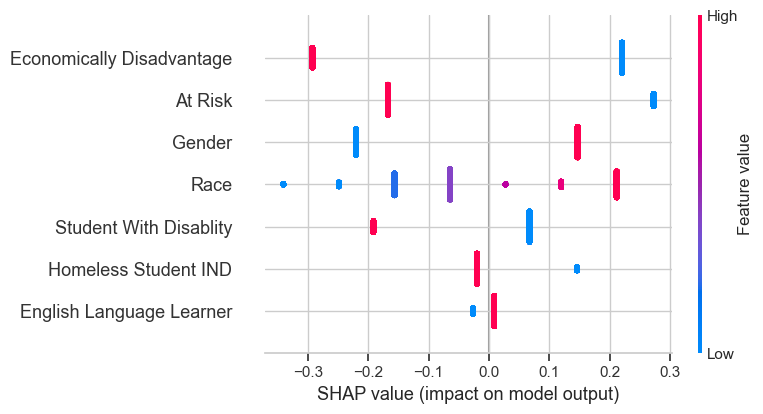

In [86]:
import shap
import matplotlib.pyplot as plt

# Logistic Regression - SHAP with LinearExplainer
log_model = models["Logistic Regression"]
log_explainer = shap.LinearExplainer(log_model, X_train, feature_perturbation="interventional")
log_shap_values = log_explainer.shap_values(X_test)

print("\nSHAP Summary Plot: Logistic Regression")
shap.summary_plot(log_shap_values, X_test, feature_names=X.columns.tolist())


### SHAP Summary Plot (Logistic Regression) — Key Takeaways:

* **Economically Disadvantaged** students had the **strongest positive impact** on predicting dropout — higher values significantly increased dropout probability.
* **At Risk** status was also a strong positive contributor, with high SHAP values pushing predictions toward dropout.
* **Gender** showed mixed effects, with some gender categories associated with increased dropout likelihood.
* **Race** had a relatively small but noticeable influence on predictions.
* **Student With Disability** had a mild positive effect on predicting dropout in some cases.
* **Homeless Student IND** and **English Language Learner** contributed minimally but still leaned toward increasing dropout probability when present.
* Overall, most key risk indicators had positive SHAP values, indicating their association with increased dropout risk in this logistic model.


In [89]:
# Random Forest - SHAP with TreeExplainer
rf_model = models["Random Forest"]
rf_explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values
rf_shap_values = rf_explainer.shap_values(X_test)

<Figure size 1000x600 with 0 Axes>

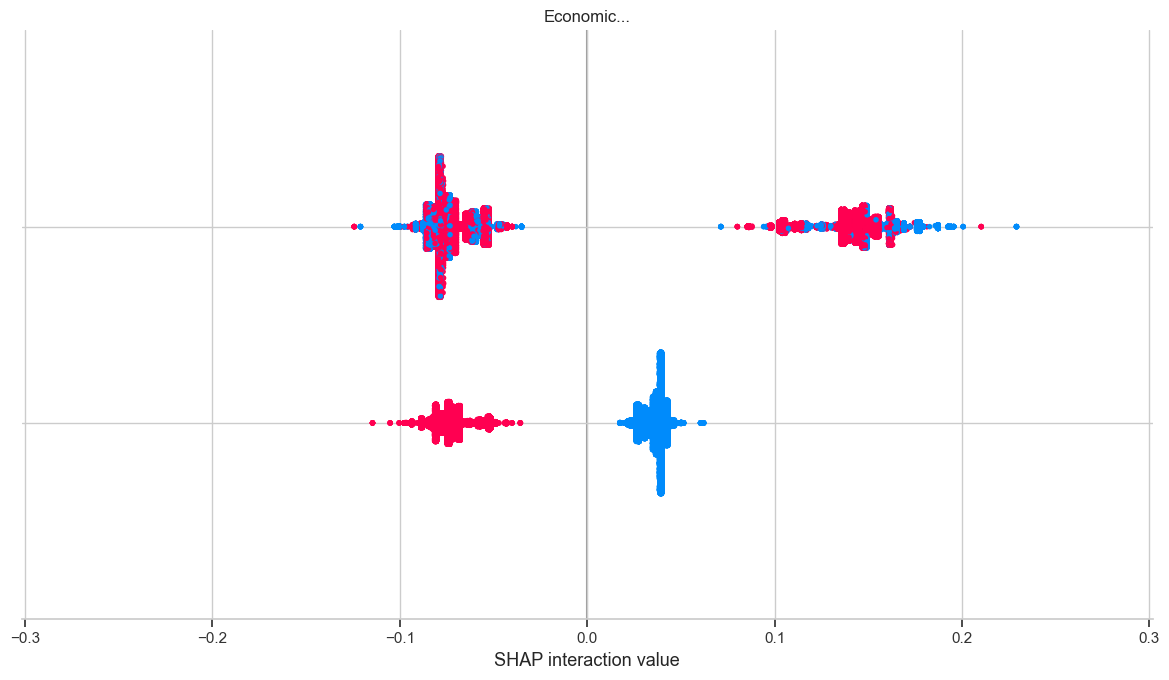

In [90]:
# Check if shap_values is a list (multi-class) or array (binary)
if isinstance(rf_shap_values, list) and len(rf_shap_values) == 2:
    # Binary classification: index 1 is typically for class=1 (dropout)
    shap.summary_plot(rf_shap_values[1], X_test, feature_names=X.columns.tolist())
else:
    # If it's not a list, use directly
    shap.summary_plot(rf_shap_values, X_test, feature_names=X.columns.tolist())


###  SHAP Summary Plot (Random Forest) — Key Takeaways:

* **Economic Disadvantage** remains the most influential predictor of dropout, with both high and low values creating a wide spread of SHAP impacts, especially toward negative (lower dropout) and positive (higher dropout) predictions.
* The model captures **nonlinear interactions**, as shown by the broader horizontal spread of SHAP values compared to Logistic Regression.
* The symmetrical distribution of points suggests **balanced influence** across many data samples.
* The combination of **red (high feature value)** and **blue (low feature value)** in both positive and negative directions implies **context-dependent effects** — i.e., the same feature might reduce or increase dropout risk depending on interactions with other variables.
* This plot emphasizes Random Forest's strength in modeling **complex feature interactions**, which can't be fully captured by linear models.



SHAP Summary Plot: XGBoost


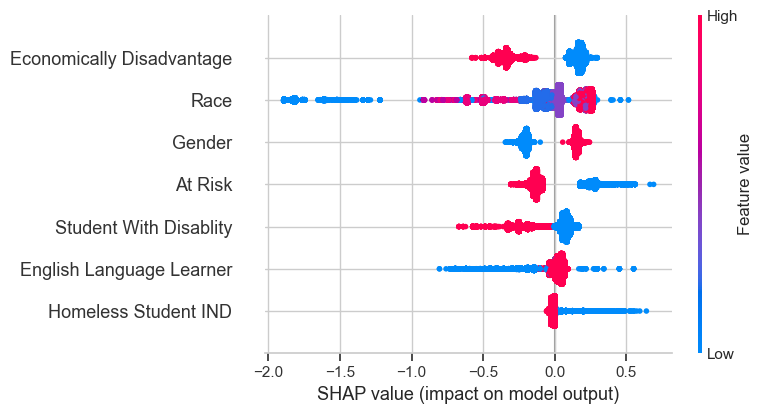

In [92]:
# XGBoost - SHAP with TreeExplainer
xgb_model = models["XGBoost"]
xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_test)

print("\nSHAP Summary Plot: XGBoost")
shap.summary_plot(xgb_shap_values, X_test, feature_names=X.columns.tolist())


###  SHAP Summary Plot (XGBoost) — Key Takeaways:

* **Race** is the most influential feature in the XGBoost model, with some categories strongly increasing or decreasing dropout risk (wide SHAP spread).
* **Economically Disadvantaged** continues to play a major role, with high values (red) driving dropout predictions upward.
* **Gender** and **At Risk** also show significant predictive power, where certain encoded values push predictions toward higher dropout likelihood.
* **Student With Disability**, **ELL**, and **Homeless Student IND** all contribute moderately, primarily increasing dropout risk when present.
* The wide variation in SHAP values, especially for Race and Economic factors, reflects **complex non-linear interactions** that XGBoost models exceptionally well.
* This model offers the clearest distinction between high-impact and low-impact cases, making it a powerful tool for **targeted intervention strategies**.


In [98]:
import pickle

# Let's say you're using XGBoost from your model dictionary
trained_model = models_trained["XGBoost"]  # or whichever model you want to deploy

# Save the trained model
with open("dropout_model.pkl", "wb") as f:
    pickle.dump(trained_model, f)


In [104]:
# Simulate Flask-like functionality in Jupyter Notebook for testing model
import pandas as pd
import pickle

# Load trained model
with open("dropout_model.pkl", "rb") as f:
    model = pickle.load(f)

# Define expected features
FEATURES = ['At Risk', 'Economically Disadvantage', 'English Language Learner',
            'Homeless Student IND', 'Gender', 'Student With Disablity', 'Race']

# Example input (simulate incoming JSON data)
sample_input = {
    'At Risk': 1,
    'Economically Disadvantage': 1,
    'English Language Learner': 0,
    'Homeless Student IND': 0,
    'Gender': 1,  # e.g., 1 = Male, 0 = Female (ensure it's encoded same as during training)
    'Student With Disablity': 0,
    'Race': 2     # e.g., if categorical encoded (Black=2, Hispanic=1, etc.)
}

# Extract input features in correct order
try:
    input_data = [sample_input[feature] for feature in FEATURES]
    df = pd.DataFrame([input_data], columns=FEATURES)

    # Make prediction
    prediction = int(model.predict(df)[0])
    probability = float(model.predict_proba(df)[0][1])

    # Output result
    print("Prediction (1 = Dropout):", prediction)
    print("Probability of Dropout:", round(probability, 4))

except Exception as e:
    print("Error:", e)


Prediction (1 = Dropout): 0
Probability of Dropout: 0.4081


In [116]:
!pip install flask



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [202]:
html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Dropout Risk Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 40px;
            background-color: #f4f4f9;
            color: #333;
        }
        h1 {
            color: #0056b3;
        }
        label {
            display: block;
            margin-top: 15px;
            font-weight: bold;
        }
        select, button {
            width: 100%;
            padding: 10px;
            margin-top: 5px;
            font-size: 14px;
        }
        button {
            background-color: #0056b3;
            color: white;
            border: none;
            cursor: pointer;
            margin-top: 20px;
        }
        button:hover {
            background-color: #003d80;
        }
        .result {
            margin-top: 30px;
            font-size: 16px;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <h1>Dropout Risk Prediction</h1>
    <form id="predictionForm">
        <label for="at_risk">At Risk:</label>
        <select id="at_risk">
            <option value="1">Yes</option>
            <option value="0">No</option>
        </select>

        <label for="econ_dis">Economically Disadvantaged:</label>
        <select id="econ_dis">
            <option value="1">Yes</option>
            <option value="0">No</option>
        </select>

        <label for="ell">ELL Status:</label>
        <select id="ell">
            <option value="1">Yes</option>
            <option value="0">No</option>
        </select>

        <label for="homeless">Homeless:</label>
        <select id="homeless">
            <option value="1">Yes</option>
            <option value="0">No</option>
        </select>

        <label for="gender">Gender:</label>
        <select id="gender">
            <option value="1">Male</option>
            <option value="0">Female</option>
        </select>

        <label for="disability">Disability:</label>
        <select id="disability">
            <option value="1">Yes</option>
            <option value="0">No</option>
        </select>

        <label for="race">Race:</label>
        <select id="race">
            <option value="0">Asian</option>
            <option value="1">Black</option>
            <option value="2">Hispanic</option>
            <option value="3">White</option>
            <option value="4">Other</option>
        </select>

        <button type="button" onclick="predict()">Predict Dropout Risk</button>
    </form>

    <div class="result" id="result">
        <p id="prediction">Prediction: [Placeholder]</p>
        <p id="probability">Probability of Dropout: [Placeholder]</p>
    </div>

   <script>
function predict() {
    const payload = {
        "At Risk": parseInt(document.getElementById("at_risk").value),
        "Economically Disadvantage": parseInt(document.getElementById("econ_dis").value),
        "English Language Learner": parseInt(document.getElementById("ell").value),
        "Homeless Student IND": parseInt(document.getElementById("homeless").value),
        "Gender": parseInt(document.getElementById("gender").value),
        "Student With Disablity": parseInt(document.getElementById("disability").value),
        "Race": parseInt(document.getElementById("race").value)
    };

    fetch("http://127.0.0.1:5000/predict", {
        method: "POST",
        headers: {
            "Content-Type": "application/json"
        },
        body: JSON.stringify(payload)
    })
    .then(response => response.json())
    .then(data => {
        if (data.error) {
            document.getElementById("result").innerText = "Error: " + data.error;
        } else {
            document.getElementById("prediction").innerText = "Prediction: " + 
                (data.prediction === 1 ? "Likely to Drop Out" : "Not Likely to Drop Out");
            document.getElementById("probability").innerText = 
                "Probability of Dropout: " + (data.dropout_probability * 100).toFixed(2) + "%";
        }
    })
    .catch(error => {
        document.getElementById("result").innerText = "An error occurred.";
        console.error("Error:", error);
    });
}
</script>


</body>
</html>
"""

# Save to file
with open("dropout.html", "w") as file:
    file.write(html_code)

print("dropout.html saved successfully.")


hfye/dropout.html saved successfully.


In [200]:
flask_code = """

from flask import Flask, request, jsonify, render_template
import pickle
import pandas as pd

with open("dropout_model.pkl", "rb") as f:
    model = pickle.load(f)

FEATURES = ['At Risk', 'Economically Disadvantage', 'English Language Learner',
            'Homeless Student IND', 'Gender', 'Student With Disablity', 'Race']

app = Flask(__name__)

@app.route('/')
def home():
    return render_template("dropout.html")  # Loads your HTML file

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json(force=True)
        input_data = [data[feature] for feature in FEATURES]
        df = pd.DataFrame([input_data], columns=FEATURES)
        prediction = int(model.predict(df)[0])
        probability = float(model.predict_proba(df)[0][1])

        return jsonify({
            "prediction": prediction,
            "dropout_probability": round(probability, 4)
        })

    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == "__main__":
    app.run(debug=True)


"""

# Save to file
with open("app.py", "w") as f:
    f.write(flask_code)
